# Data story

Performed exploratory data analysis of the dataset containing historical data on defaults of the bank customers in Taiwan for the 6 months in 2005. The dataset contains information on the customer age, credit limit, educational level, marital status, sex, as well as bill amount, payment amount, and repayment status for April through September 2005. 

The main goal for EDA was to better understand what features could be good predictors to answer the question of whether a customer was going to default in October 2005. 

Analyzed the distributions of age and credit amount for defaulted and not defaulted customers. The median credit amount for the defaulted was 90,000 NT dollars, compared to 150,000 NT dollars for not defaulted. The median age for both categories was 34 years old, however, there was a moderate shift of the distribution's mode for defaulted vs not defaulted customers from 27 to 29 years old. As expected we observed that people who did not default tended to have a larger credit amount and were slightly older.

Then performed a similar analysis, but, this time, considered the customers who always paid bills on time and those who always delayed payments. These two groups were filtered out based on their repayment status. The customers who paid always paid on time have a median credit limit of 210,000 NT dollars and those who always delayed have only 70,000 NT dollars. The distributions of credit limit were also different, for the customers who always paid on time, it was more bell-shaped and less skewed. For the age columns, the median value of age for customers who always paid on time was 36 years old, and 34 years old for customers who always delayed payments. Similarly to the credit limit distributions, the age distribution of customers who always paid on time was less skewed compared to the distributions for all customers and for the customers who always delayed payments.

From the data on bill amounts and the payment amounts from April through September 2005 we investigated pairwise relationships between the bill amount in a given month vs the payment amount in the following month using scatter plots. There were two clear trends: correlation between the minimum payments and the bill amounts, and the full bill repayments and the bill amounts. As expected, of those who pay more than a minimum payment each month the customers who did not default form a larger proportion.

By this dataset, we were given a "snapshot" of economically active adults in Taiwanese society. It became clear from basic EDA that we are dealing with young, educated society with 60% female population. 82% of the customers have at least a bachelor's degree. In each educational category, there are more female customers.

The majority of customers are either married or single, with a very small proportion divorced. For example, 98.8% of customers with a bachelor's degree are either married or single, the rest are either divorced or classified as other. There are 53.2% single customers in the data set vs 45.53% who are married. Out of those who are married, 77.3% have at least a bachelor's degree, out of those who are single 86.6% have at least a bachelor's degree.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_context('paper', font_scale=1.5, rc={'figure.figsize':(7,5)})
sns.set_style(style='white')
%matplotlib inline


df = pd.read_csv("defaults.csv", header = 1, index_col = 'ID')
df.columns = [x.lower() for x in list(df.columns)]
df.columns = ['credit_amount', 'sex', 'education', 'marital_status', 'age', 'pay_sept', 
              'pay_aug','pay_jul', 'pay_jun', 'pay_may', 'pay_apr', 'bill_amt_sept', 
              'bill_amt_aug', 'bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 
              'bill_amt_apr', 'pay_amt_sept','pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun', 
              'pay_amt_may', 'pay_amt_apr','default']

for column in ['credit_amount', 'bill_amt_sept', 'bill_amt_aug',
       'bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr', 'pay_amt_sept',
       'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun', 'pay_amt_may', 'pay_amt_apr']:
    df[column] = df[column]/1000
    
gender_remapping = {1: 'male', 2: 'female'}
df.sex = df.sex.map(gender_remapping)

df.education = df.education.astype(str)
education_remapping = {'1': 'grad_school', '2': 'bachelor', '3': 'high_school', 
                       '4': 'other', '5': 'other', '6': 'other', '0': 'other'}
df.education = df.education.map(education_remapping)

df.marital_status = df.marital_status.astype(str)
marital_status_remapping = {'1': 'married', '2': 'single', '3': 'divorce', '0': 'other'}
df.marital_status = df.marital_status.map(marital_status_remapping)

First let's calculate the percentage of customers who defaulted on their credit cards in October 2005. 

About 22% percent defaulted.

In [2]:
print('Number of people who defaulted is: ' + 
      str(len(df[df.default == 1])))
print('Number of people who did not default is: ' + 
      str(len(df[df.default == 0])))
print('Giving defaults percentage: ' + 
      str((len(df[df.default == 1])/len(df))*100) + '%')

Number of people who defaulted is: 6636
Number of people who did not default is: 23364
Giving defaults percentage: 22.12%


We can now investigate how the amount of availbale credit is distributed for three categories of customers: 

all, 

defaulted and 

not defaulted customers.

All three distributions are right skewed. The customers who defaulted had smaller median credit amount - 90,000 NT dollars, compared to the customers who did not default - 150,000 NT dollars. 

Median credit amount for customers who defaulted = 90.0
Median credit amount for customers who did not default = 150.0
Mean credit amount for customers who defaulted = 130.10965641952984
Mean credit amount for customers who did not default = 178.09972607430234


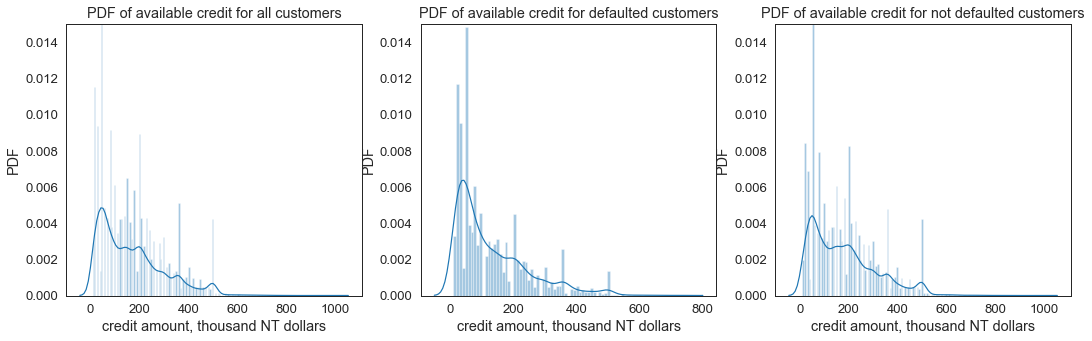

In [3]:
# All customers.
credit = df['credit_amount']
# Defaulted customers.
credit_defaulted = df[df.default == 1]['credit_amount']
# Non-defaulted customers.
credit_not_defaulted = df[df.default == 0]['credit_amount']

print('Median credit amount for customers who defaulted = ' + 
      str(np.median(credit_defaulted)))
print('Median credit amount for customers who did not default = ' + 
      str(np.median(credit_not_defaulted)))

print('Mean credit amount for customers who defaulted = ' + 
      str(np.mean(credit_defaulted)))
print('Mean credit amount for customers who did not default = ' + 
      str(np.mean(credit_not_defaulted)))

#Let's plot the distributin for the credit amount for all customers. 
#The number of bins is defined as a square root of the number of values in aray. 

fig, ax = plt.subplots(1, 3)

ax1 = sns.distplot(credit, 
             bins=int(np.sqrt(len(credit))), 
             kde=True, 
             ax = ax[0])
ax1.set(xlabel='credit amount, thousand NT dollars', ylabel='PDF', 
    title = 'PDF of available credit for all customers', ylim=(0, 0.015))

ax2 = sns.distplot(credit_defaulted, 
                    bins=int(np.sqrt(len(credit_defaulted))), 
                    kde=True, 
                    ax = ax[1])
ax2.set(xlabel='credit amount, thousand NT dollars', ylabel='PDF', 
    title = 'PDF of available credit for defaulted customers', ylim=(0, 0.015))

ax3 = sns.distplot(credit_not_defaulted, 
                     bins=int(np.sqrt(len(credit_not_defaulted))), 
                     kde=True, 
                     ax = ax[2])
ax3.set(xlabel='credit amount, thousand NT dollars', ylabel='PDF', 
    title = 'PDF of available credit for not defaulted customers', ylim=(0, 0.015))

fig.set_size_inches(18, 5)

plt.show()

Now plotting the above three density functions on the same plot.

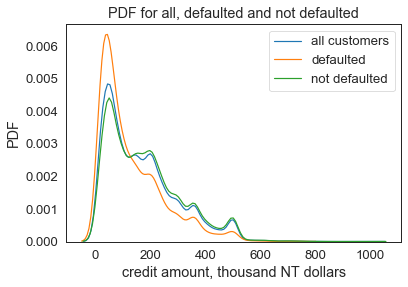

In [4]:
ax = sns.distplot(credit, bins=int(np.sqrt(len(credit))), kde=True, 
                  hist = False, label = 'all customers')
ax = sns.distplot(credit_defaulted, bins=int(np.sqrt(len(credit_defaulted))), 
                  kde=True, hist = False, label = 'defaulted')
ax = sns.distplot(credit_not_defaulted, bins=int(np.sqrt(len(credit_not_defaulted))), 
                  kde=True, hist = False, label = 'not defaulted')
ax.set(xlabel='credit amount, thousand NT dollars', ylabel='PDF', 
       title = 'PDF for all, defaulted and not defaulted')

plt.show()

Continuing analysis of the credit amount column. In additiona to categories - defaulted and not defaulted, we have information on the repayment status for each customer for each month. It is interesting to understand how the distribution of the credit amount will change, for example, for the customers who always payed on time and for the customers who always delayed payments.

Out of 30000, there are 5195 customers who always payed on time and 1341 customers who always delayed payments. 

In [5]:
# Here I am filtering out rows for the customers who always pay 
# on time, and the customers who always delay payments.

credit = df['credit_amount']
credit_paym_on_time = df[(df.pay_sept < 0)&(df.pay_aug < 0)&(df.pay_jul < 0)& 
                         (df.pay_jun < 0)&(df.pay_may < 0)&(df.pay_apr < 0)]['credit_amount']

credit_paym_delay = df[(df.pay_sept > 0)&(df.pay_aug > 0)&(df.pay_jul > 0)& 
                       (df.pay_jun > 0)&(df.pay_may > 0)&(df.pay_apr > 0)]['credit_amount']

print('The number of customers who always pay on time: ' +  
      str(len(credit_paym_on_time)))
print('The number of customers who always delay payments: ' + 
      str(len(credit_paym_delay)))
print('Total number of customers: ' + 
      str(len(credit)))

The number of customers who always pay on time: 5195
The number of customers who always delay payments: 1341
Total number of customers: 30000


For the customers who always payed on time, the shape of credit amount distribution is different from the distribution for all cutomers. It's maximum is shifted towards larger values of credit amount, with the median at 210,000 NT dollars. Something you would expect for customers who tend to make payment without delay.

For the customers who always delay payments. It is clear that the distribution maximum is shifted towards smaller credit values, with the median at 50,000 NT dollars. 

Median credit amount for customers who always pay on time = 210.0
Median credit amount for customers who always delay payments = 70.0


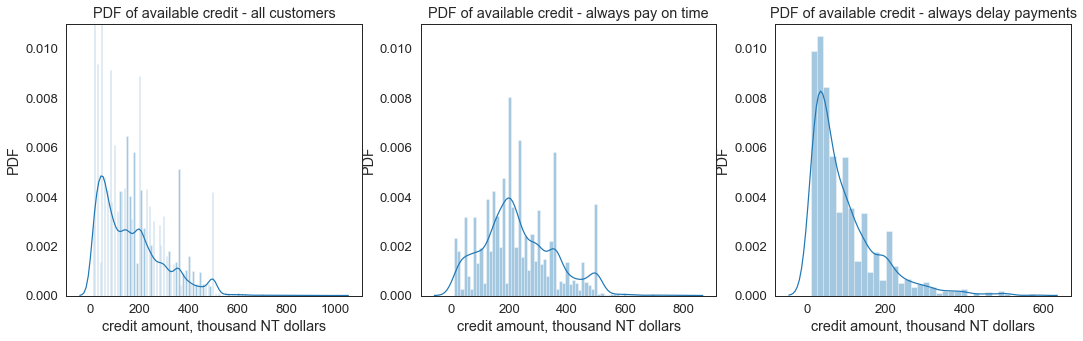

In [6]:
fig, ax = plt.subplots(1, 3)

print('Median credit amount for customers who always pay on time = ' + 
      str(np.median(credit_paym_on_time)))
print('Median credit amount for customers who always delay payments = ' + 
      str(np.median(credit_paym_delay)))

ax1 = sns.distplot(credit, 
                   bins=int(np.sqrt(len(credit))), 
                   kde=True, 
                   ax = ax[0])
ax1.set(xlabel='credit amount, thousand NT dollars', ylabel='PDF', 
    title = 'PDF of available credit - all customers', ylim=(0, 0.011))

ax2 = sns.distplot(credit_paym_on_time, 
                   bins=int(np.sqrt(len(credit_paym_on_time))), 
                   kde=True, 
                   ax = ax[1])
ax2.set(xlabel='credit amount, thousand NT dollars', ylabel='PDF', ylim = (0, 0.011),
    title = 'PDF of available credit - always pay on time')

ax3 = sns.distplot(credit_paym_delay, 
                   bins=int(np.sqrt(len(credit_paym_delay))), 
                   kde=True, 
                   ax = ax[2])
ax3.set(xlabel='credit amount, thousand NT dollars', ylabel='PDF', ylim = (0, 0.011),
    title = 'PDF of available credit - always delay payments')

fig.set_size_inches(18, 5)
plt.show()

We can now plot all three above distributions on the same plot to directly compare them. 

The tail in the distribtuion of credit amount for all customers is mainly coming from the influence of customers who tend to pay their bills on time. 

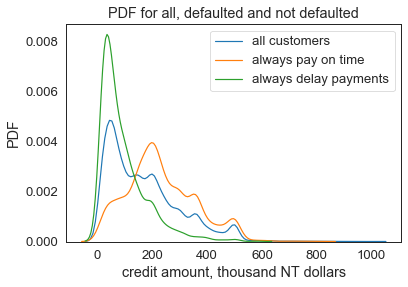

In [7]:
ax = sns.distplot(credit, bins=int(np.sqrt(len(credit))), kde=True, 
                  hist = False, label = 'all customers')
ax = sns.distplot(credit_paym_on_time, bins=int(np.sqrt(len(credit_paym_on_time))), 
                  kde=True, hist = False, label = 'always pay on time')
ax = sns.distplot(credit_paym_delay, bins=int(np.sqrt(len(credit_paym_delay))), 
                  kde=True, hist = False, label = 'always delay payments')
ax.set(xlabel='credit amount, thousand NT dollars', ylabel='PDF', 
       title = 'PDF for all, defaulted and not defaulted')

plt.show()

Let's do similar analysis for the customer age. For defaulted and not-defaulted customers, and then for those who always do or don't pay on time.

Mode of the age distribution: customers who defaulted = 27
Mode of the age distribtuion: customers who did not default = 29
Median of the age distribution: customers who defaulted = 34.0
Median of the age distribtuion: customers who did not default = 34.0
Mean of the age distribution: customers who defaulted = 35.72573839662447
Mean of the age distribtuion: customers who did not default = 35.417265879130284


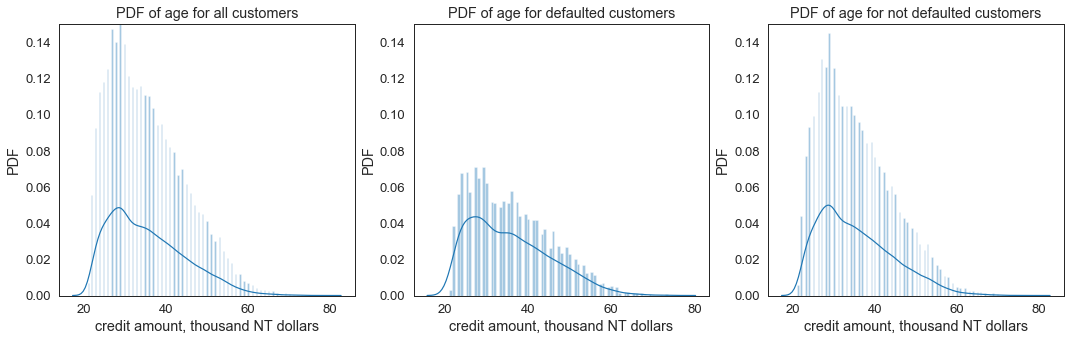

In [8]:
# All customers.
age = df['age']
# Defaulted customers.
age_defaulted = df[df.default == 1]['age']
# Non-defaulted customers.
age_not_defaulted = df[df.default == 0]['age']

print('Mode of the age distribution: customers who defaulted = ' + 
      str(stats.mode(age_defaulted)[0][0]))
print('Mode of the age distribtuion: customers who did not default = ' + 
      str(stats.mode(age_not_defaulted)[0][0]))

print('Median of the age distribution: customers who defaulted = ' + 
      str(np.median(age_defaulted)))
print('Median of the age distribtuion: customers who did not default = ' + 
      str(np.median(age_not_defaulted)))

print('Mean of the age distribution: customers who defaulted = ' + 
      str(np.mean(age_defaulted)))
print('Mean of the age distribtuion: customers who did not default = ' + 
      str(np.mean(age_not_defaulted)))

#Let's plot the distributin for the credit amount for all customers. 
#The number of bins is defined as square root of the number of values in a series. 

fig, ax = plt.subplots(1, 3)

ax1 = sns.distplot(age, 
                   bins=int(np.sqrt(len(age))), 
                   kde=True, 
                   ax = ax[0])
ax1.set(xlabel='credit amount, thousand NT dollars', ylabel='PDF', 
    title = 'PDF of age for all customers', ylim=(0, 0.15))

ax2 = sns.distplot(age_defaulted, 
                   bins=int(np.sqrt(len(age_defaulted))), 
                   kde=True, 
                   ax = ax[1])
ax2.set(xlabel='credit amount, thousand NT dollars', ylabel='PDF', 
    title = 'PDF of age for defaulted customers', ylim=(0, 0.15))

ax3 = sns.distplot(age_not_defaulted, 
                   bins=int(np.sqrt(len(age_not_defaulted))), 
                   kde=True, 
                   ax = ax[2])
ax3.set(xlabel='credit amount, thousand NT dollars', ylabel='PDF', 
    title = 'PDF of age for not defaulted customers', ylim=(0, 0.15))

fig.set_size_inches(18, 5)

plt.show()

Now plotting above density plots on the same plot to directly compare them. 

There is a moderate shift of the distribution mode for defaulted vs not defaulted customers from 27 to 29 years old, however the median age stays the same at 34 years old.

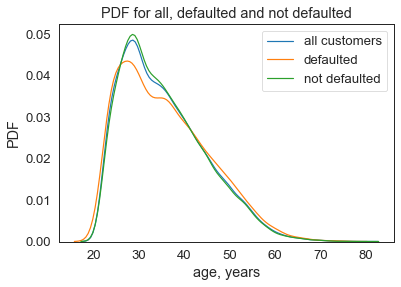

In [9]:
ax = sns.distplot(age, bins=int(np.sqrt(len(credit))), kde=True, 
                  hist = False, label = 'all customers')
ax = sns.distplot(age_defaulted, bins=int(np.sqrt(len(age_defaulted))), 
                  kde=True, hist = False, label = 'defaulted')
ax = sns.distplot(age_not_defaulted, bins=int(np.sqrt(len(age_not_defaulted))), 
                  kde=True, hist = False, label = 'not defaulted')
ax.set(xlabel='age, years', ylabel='PDF', 
       title = 'PDF for all, defaulted and not defaulted')

plt.show()

Now moving on to the similar analysis for those who do and don't pay on time.

The distribution of ages for all customers - the distribution median = 34 years old with a significant skew to the right.

And the distribution of ages for customers who always pay on time. We can now see that the skew is reduced and the median = 36 years old, shifts towards older ages. Seems reasonable that older customers tend to pay their bills always on time.

And, finally, the distribution of ages for customers who always delay payments resembles the distribution for all customers and the median age is the same = 34 years old.

Median age for all customers = 34.0
Median age for customers who always pay on time = 36.0
Median age for customers who always delay payments = 34.0


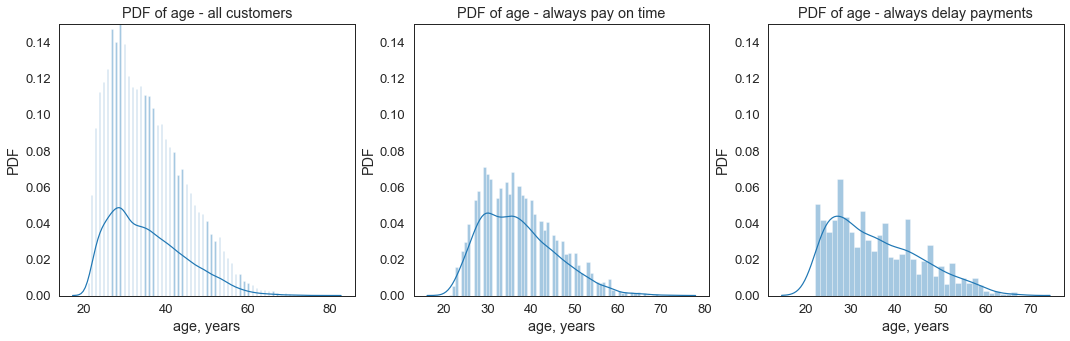

In [10]:
age = df['age']

age_paym_on_time = df[(df.pay_sept < 0)&(df.pay_aug < 0)&(df.pay_jul < 0)&(df.pay_jun < 0)& 
                      (df.pay_may < 0)&(df.pay_apr < 0)]['age']

age_paym_delay = df[(df.pay_sept > 0)&(df.pay_aug > 0)&(df.pay_jul > 0)&(df.pay_jun > 0)& 
                    (df.pay_may > 0)&(df.pay_apr > 0)]['age']

print('Median age for all customers = ' + 
      str(np.median(age)))
print('Median age for customers who always pay on time = ' + 
      str(np.median(age_paym_on_time)))
print('Median age for customers who always delay payments = ' + 
      str(np.median(age_paym_delay)))

fig, ax = plt.subplots(1, 3)

ax1 = sns.distplot(age, 
                   bins=int(np.sqrt(len(credit))), 
                   kde=True, 
                   ax = ax[0])
ax1.set(xlabel='age, years', ylabel='PDF', 
    title = 'PDF of age - all customers', ylim=(0, 0.15))

ax2 = sns.distplot(age_paym_on_time, 
                   bins=int(np.sqrt(len(age_paym_on_time))), 
                   kde=True, 
                   ax = ax[1])
ax2.set(xlabel='age, years', ylabel='PDF', ylim = (0, 0.15),
    title = 'PDF of age - always pay on time')

ax3 = sns.distplot(age_paym_delay, 
                   bins=int(np.sqrt(len(age_paym_delay))), 
                   kde=True, 
                   ax = ax[2])
ax3.set(xlabel='age, years', ylabel='PDF', ylim = (0, 0.15),
    title = 'PDF of age - always delay payments')

fig.set_size_inches(18, 5)
plt.show()

The distribution of ages on the same plot for three above cases.

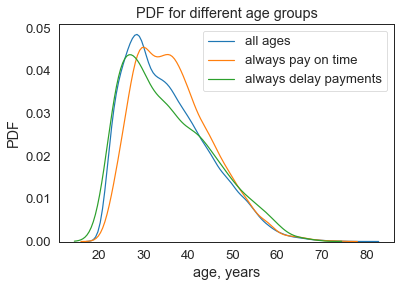

In [11]:
ax = sns.distplot(df['age'], 
                  bins=int(np.sqrt(len(age))), 
                  kde=True, 
                  hist = False, 
                  label = 'all ages')
ax = sns.distplot(age_paym_on_time, 
                  bins=int(np.sqrt(len(age_paym_on_time))), 
                  kde=True, 
                  hist = False, 
                  label = 'always pay on time')
ax = sns.distplot(age_paym_delay, 
                  bins=int(np.sqrt(len(age_paym_delay))), 
                  kde=True, 
                  hist = False, 
                  label = 'always delay payments')
ax.set(xlabel='age, years', ylabel='PDF', title = 'PDF for different age groups')

plt.show()

We have so far investigated how the age and credit amount distribtuions change depending on whether they defaulted or not and whether they paid always on time or always delayed payments. 

Now let's visualize in more detail pairwise relationship between them. We can also add a third variable - marital status. It will give a better understanding about what type of society we are considering here. 

By looking at the density plots of age we can see that the large proportion of popolation in this dataset are single adults in their 20th and 30th, which is a sign of a young population.

The density plots of the credit amount clearly show that the customers who are divorced tend to get smaller median credit amount compared to the customers who are either single or married.

The scatter plot shows that there is no strong correlation between the age and credit limit for all marital status categories.

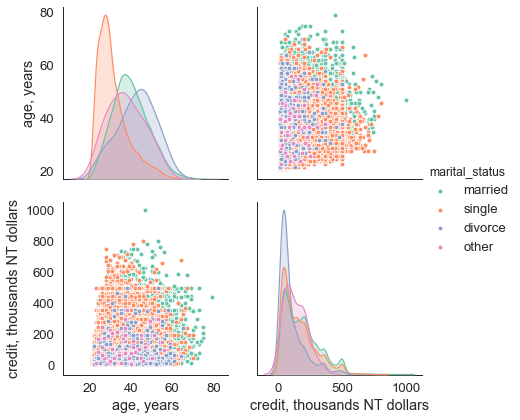

In [12]:
g = sns.pairplot(df[['age', 'credit_amount', 'marital_status']], 
                 hue="marital_status", 
                 palette="Set2", 
                 diag_kind="auto", 
                 height=3, 
                 plot_kws={'alpha': 1})

# Creating a dictionary of more descriptive labels.
replacements = {'credit_amount': 'credit, thousands NT dollars', 
                'marital_status': 'marital status', 
                'age': 'age, years'}

# Updating labels.
for i in range(2):
    for j in range(2):
        xlabel = g.axes[i][j].get_xlabel()
        ylabel = g.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])
        
plt.show()

Now adding a new third variable  - education level.

Looking at the density plots of age, the majority of customers with graduate degrees are in their late 20th and early 30th. Customers with high school diploma tend to get a credit card later in life. 

Interestingly there is no strong distinction between the customers with a high school diploma and a univrsity degress in terms of credit amount.

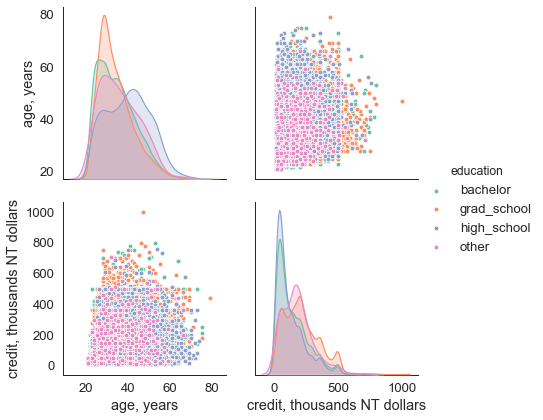

In [13]:
g = sns.pairplot(df[['age', 'credit_amount', 'education']], 
                 hue="education", 
                 palette="Set2", 
                 diag_kind="auto", 
                 height=3)

# Creating a dictionary of more descriptive labels.
replacements = {'credit_amount': 'credit, thousands NT dollars', 
                'age': 'age, years'}

# Updating labels.
for i in range(2):
    for j in range(2):
        xlabel = g.axes[i][j].get_xlabel()
        ylabel = g.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])
        
plt.show()

Compared to the density plots in the above paiwise comparisons, the violin plots below give slightly different representation of the credit amount distribution for different educational levels and marital statuses. The conclusions remain the same as for pairplots.

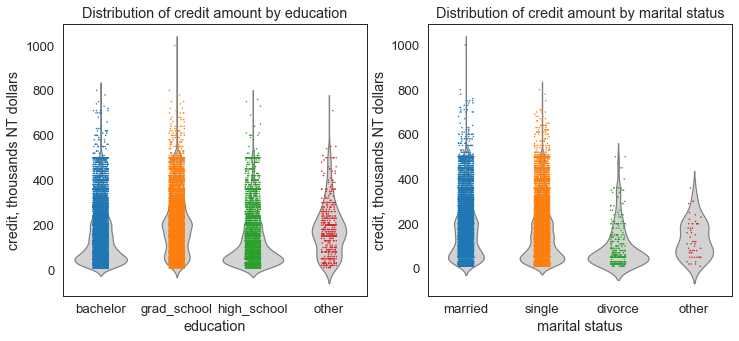

In [14]:
fig, ax = plt.subplots(1, 2)

# Vizualization the amount of availbale credit as a function of educational level.
ax1 = sns.violinplot(x='education', 
               y='credit_amount', 
               data=df, 
               inner=None, 
               color='lightgray', 
               ax=ax[0])
# Overlay a strip plot on the violin plot
ax1 = sns.stripplot(x='education', 
              y='credit_amount', 
              data=df, 
              jitter=True, 
              size = 1.5, 
              ax=ax[0])
ax1.set(xlabel = 'education', 
        ylabel='credit, thousands NT dollars', 
        title = 'Distribution of credit amount by education')

# Vizualization of the amount of availbale credit as a function of marital status.
ax2 = sns.violinplot(x='marital_status', 
                     y='credit_amount', 
                     data=df, 
                     inner=None, 
                     color='lightgray', 
                     ax=ax[1])
# Overlay a strip plot on the violin plot
ax2 = sns.stripplot(x='marital_status', 
                    y='credit_amount', 
                    data=df, 
                    jitter=True, 
                    size = 1.5, 
                    ax=ax[1])
ax2.set(xlabel = 'marital status', ylabel='credit, thousands NT dollars', 
    title = 'Distribution of credit amount by marital status')

fig.set_size_inches(12, 5)
plt.show()


Now adding to a pairplot another third variable  - gender. There are no strong conclusions here, apart from the fact that female customers are somewhat younger and get slightly larger credit amount.

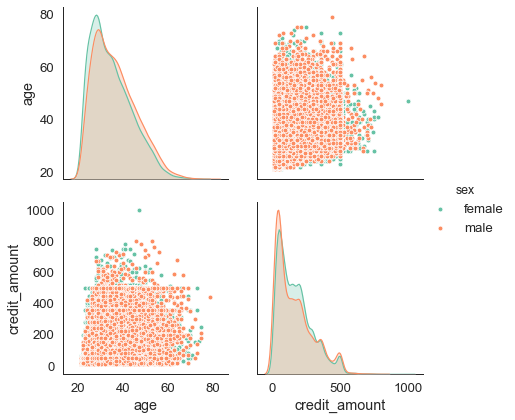

In [15]:
sns.pairplot(df[['age', 'credit_amount', 'sex']], 
             hue='sex', 
             palette='Set2', 
             diag_kind='auto', 
             height=3)

# Creating a dictionary of more descriptive labels.
replacements = {'credit_amount': 'credit, thousands NT dollars', 
                'age': 'age, years'}

# Updating labels.
for i in range(2):
    for j in range(2):
        xlabel = g.axes[i][j].get_xlabel()
        ylabel = g.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])
        
plt.show()

We can investigate pairwise relationships between the bill amount this month and the payment amount next month. These should be correlated, and in fact we can see two ways how they are correlated. By simply analyzing the scatter plots for defaulted and not defaulted customers, overlayed, we can see trends correspondig to the minimum payments and full repayments of the bill amounts. 

In addition, among the customers who did not default a larger proportion paid the full bill amount or above minimum required payment, compared to defaulted customers.

There are outliers on the plots, majority of them show the customers who in fact paid much larger or smaller amounts compared to the previous month bill. 

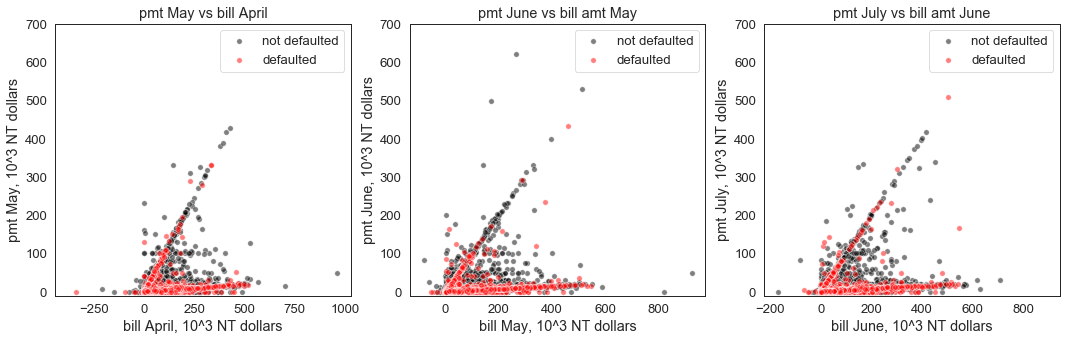

In [16]:
# Investigating relationship between the payment amounts for current and previous month, pairwise.

sns.set_context('paper', 
                font_scale=1.5, 
                rc={'figure.figsize':(7,5)})
sns.set_style(style='white')

fig, ax = plt.subplots(1,3)

sns.relplot(x='bill_amt_apr', 
            y='pay_amt_may', 
            data=df[(df.default == 0)], 
            s = 30, 
            alpha = 0.5, 
            color = 'black', 
            ax = ax[0], 
            label = 'not defaulted')
sns.relplot(x='bill_amt_apr', 
            y='pay_amt_may', 
            data=df[(df.default == 1)], 
            s = 30, 
            alpha = 0.5, 
            color = 'red', 
            ax = ax[0], 
            label = 'defaulted')
ax[0].set(xlabel = 'bill April, 10^3 NT dollars', 
          ylabel='pmt May, 10^3 NT dollars', 
          title = 'pmt May vs bill April')
ax[0].legend(loc = 'upper right')
ax[0].set_ylim(-10, 700)

sns.relplot(x='bill_amt_may', 
            y='pay_amt_jun', 
            data=df[(df.default == 0)], 
            s = 30, 
            alpha = 0.5, 
            color = 'black', 
            ax = ax[1], 
            label = 'not defaulted')
sns.relplot(x='bill_amt_may', 
            y='pay_amt_jun', 
            data=df[(df.default == 1)], 
            s = 30, 
            alpha = 0.5, 
            color = 'red', 
            ax = ax[1], 
            label = 'defaulted')
ax[1].set(xlabel = 'bill May, 10^3 NT dollars', 
          ylabel='pmt June, 10^3 NT dollars', 
          title = 'pmt June vs bill amt May')
ax[1].legend(loc = 'upper right')
ax[1].set_ylim(-10, 700)

sns.relplot(x='bill_amt_jun', 
            y='pay_amt_jul', 
            data=df[(df.default == 0)], 
            s = 30, 
            alpha = 0.5, 
            color = 'black', 
            ax = ax[2], 
            label = 'not defaulted')
sns.relplot(x='bill_amt_jun', 
            y='pay_amt_jul', 
            data=df[(df.default == 1)], 
            s = 30, alpha = 0.5, 
            color = 'red', 
            ax = ax[2], 
            label = 'defaulted')
ax[2].set(xlabel = 'bill June, 10^3 NT dollars', 
          ylabel='pmt July, 10^3 NT dollars', 
          title = 'pmt July vs bill amt June')
ax[2].legend(loc = 'upper right')
ax[2].set_ylim(-10, 700)

fig.set_size_inches(18, 5)

for i in range(2,8):
    plt.close(i)

plt.show()

To learn a little bit nore about the customers in this dataset we can now move on and investigate visually what are the proportions of customers by education and also by adding a third variable, either sex or marital status. 

82% of the customers either have a university degree or a graduate degree.

By looking at the middle plot we can conclude that in each educational category there is a larger amount of female customers, which is consistent with the fact that out of all customers 60% percent are female.

From the right plot it is clear that the majority of customers are either married or single, with a very small proportion who are divorced. 98.8% of customers with university degree, 99.5% with a graduate degree and 97% with high school diploma are either married or single, the rest are either divorced or classified as other.

Percentage of customers who are either have a bachelor degree or a gradudate degree = 82.05%
Percentage of customers who are either married or single, and with a bachelor degree = 98.80256593014968%
Percentage of customers who are either married or single, and with a graduate degree = 99.48984411903638%
Percentage of customers who are either married or single, and with a high school diploma = 97.01037217815741%


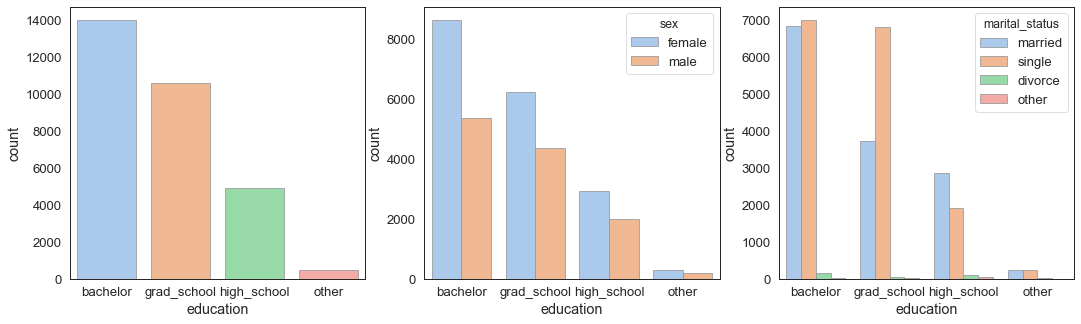

In [17]:
fig, ax = plt.subplots(1, 3)
# Plotting the customer counts by their education
sns.catplot(x='education', kind="count",
            palette="pastel", edgecolor=".6",
            data=df, ax = ax[0])
# Now adding a third varaible to the above counts - gender
sns.catplot(x='education', kind="count", hue='sex',
            palette="pastel", edgecolor=".6",
            data=df, ax = ax[1])
# And finally adding marital status to the customer counts.
sns.catplot(x='education', kind="count", hue='marital_status',
            palette="pastel", edgecolor=".6",
            data=df, ax = ax[2])

fig.set_size_inches(18, 5)

university_grad_school = len(df[(df.education == 'bachelor') | (df.education == 'grad_school')])/len(df)
print('Percentage of customers who are either have a bachelor degree or a gradudate degree = ' +
      str(university_grad_school * 100) + '%')

marr_sing_univ = len(df[(df.education == 'bachelor') & ((df.marital_status == 'married') | \
                        (df.marital_status == 'single'))])/len(df[df.education == 'bachelor'])
print('Percentage of customers who are either married or single, and with a bachelor degree = ' +
      str(marr_sing_univ * 100) + '%')

marr_sing_grad_school = len(df[(df.education == 'grad_school') & ((df.marital_status == 'married') | \
                        (df.marital_status == 'single'))])/len(df[df.education == 'grad_school'])
print('Percentage of customers who are either married or single, and with a graduate degree = ' +
      str(marr_sing_grad_school * 100) + '%')

marr_sing_high_school = len(df[(df.education == 'high_school') & ((df.marital_status == 'married') | \
                        (df.marital_status == 'single'))])/len(df[df.education == 'high_school'])
print('Percentage of customers who are either married or single, and with a high school diploma = ' +
      str(marr_sing_high_school * 100) + '%')

plt.close(2)
plt.close(3)
plt.close(4)
plt.show()

Female customers form 60% of observations. Which is characterisitcal of Taiwanese demographics.

In [18]:
# Counting the number of female and male customers.

print('Number of female customers is: ' + 
      str(len(df[df.sex == 'female'])))
print('Number of male customers is: ' + 
      str(len(df[df.sex == 'male'])))

Number of female customers is: 18112
Number of male customers is: 11888


We can have a slightly different view on the above proportions, first by counting by marital status and then adding a third variable - education.

Overall, there are more single customers in the data set - 53.2% vs 45.53% who are married. Out of those who are married 77.3% have either a university or a graduate degree. Out of those who are single this percentage is even higher - 86.6%.

Percentage of customers who are married = 45.53%
Percentage of customers who are single = 53.21333333333334%
Percentage of customers who are married, and have a bachelor or a graduate degree = 77.34094736071455%
Percentage of customers who are single, and have a bachelor or a graduate degree = 86.62615885742922%


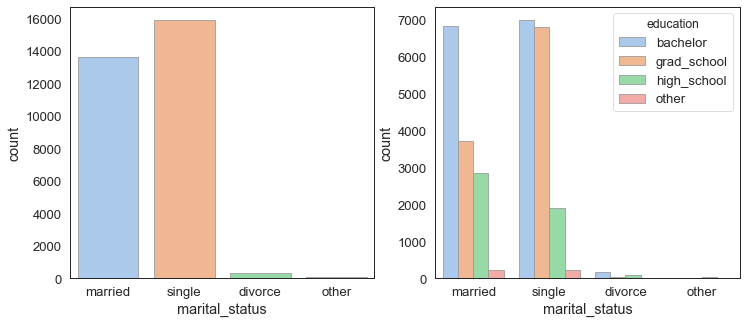

In [19]:
# Plotting the customer counts by their marital status and adding a third variable

fig, ax = plt.subplots(1, 2)
# Plotting the customer counts by their marital status
sns.catplot(x='marital_status', 
            kind='count',
            palette='pastel', 
            edgecolor='.6',
            data=df, 
            ax = ax[0])
# And finally adding education to the customer counts.
sns.catplot(x='marital_status', 
            kind='count', 
            hue = 'education',
            palette='pastel', 
            edgecolor='.6',
            data=df, 
            ax = ax[1])
fig.set_size_inches(12, 5)
plt.close(2)
plt.close(3)

married = len(df[df.marital_status == 'married'])/len(df)
print('Percentage of customers who are married = ' + str(married * 100) + '%')

single = len(df[df.marital_status == 'single'])/len(df)
print('Percentage of customers who are single = ' + str(single * 100) + '%')

married_uni_grad = len(df[(df.marital_status == 'married') & \
                 ((df.education == 'bachelor') | \
                  (df.education == 'grad_school'))])/len(df[df.marital_status == 'married'])
print('Percentage of customers who are married, and have a bachelor or a graduate degree = ' + 
      str(married_uni_grad * 100) + '%')

single_uni_grad = len(df[(df.marital_status == 'single') & \
                 ((df.education == 'bachelor') | \
                  (df.education == 'grad_school'))])/len(df[df.marital_status == 'single'])
print('Percentage of customers who are single, and have a bachelor or a graduate degree = ' + 
      str(single_uni_grad * 100) + '%')

plt.show()